# Principal Patterns Paper Plots - Curtailment and Mismatch

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.colors import LinearSegmentedColormap
import numpy as np
import pypsa
import os
import sys
import geopandas
import tables
import matplotlib
from operator import itemgetter, attrgetter
import cartopy
import cartopy.io.shapereader as shpreader
import cartopy.crs as ccrs
from sklearn.preprocessing import Normalizer

In [2]:
directory = "../data/"

## Curtailment figure

In [ ]:
# File name - Transmission constraint
filePypsaTrans = ["postnetwork-elec_only_0_0.05.h5",
                  "postnetwork-elec_only_0.0625_0.05.h5",
                  "postnetwork-elec_only_0.125_0.05.h5",
                  "postnetwork-elec_only_0.25_0.05.h5",
                  "postnetwork-elec_only_0.375_0.05.h5"]

# Preallocate lists
windDispatchTransLoad = []
solarDispatchTransLoad = []
rorDispatchTransLoad = []

windDispatchTransGenerator = []
solarDispatchTransGenerator = []
rorDispatchTransGenerator = []

for file in filePypsaTrans:
    # Load Netowork
    network = pypsa.Network(directory + file)
    
    # Determine dispatchable energy for all generators at every hour
    dispatchable = network.generators_t.p
    
    # Determine non-dispatchable energy for all generators at every hour
    nonDispatchable = network.generators_t.p_max_pu * network.generators.p_nom_opt
    
    # Difference between dispatchable and non-dispatchable
    difference = nonDispatchable - dispatchable
    
    # Break into components and sum up the mean
    windDispatch = difference[[x for x in difference.columns if "wind" in x]].mean(axis=0).sum()
    solarDispatch = difference[[x for x in difference.columns if "solar" in x]].mean(axis=0).sum()
    rorDispatch = difference[[x for x in difference.columns if "ror" in x]].mean(axis=0).sum()

    # Load of network
    load = network.loads_t.p.mean(axis=0).sum()
    
    # Generation (wind, solar, ror)
    wind = network.generators_t.p[[x for x in network.generators_t.p.columns if "wind" in x]]
    wind = wind.groupby(wind.columns.str.slice(0,2), axis=1).sum().mean(axis=0).sum()
    solar = network.generators_t.p[[x for x in network.generators_t.p.columns if "solar" in x]].mean(axis=0).sum()
    ror = network.generators_t.p[[x for x in network.generators_t.p.columns if "ror" in x]].mean(axis=0).sum()
    
    
    # Append to array - Load relative
    windDispatchTransLoad.append((windDispatch/load)*100)
    solarDispatchTransLoad.append((solarDispatch/load)*100)
    rorDispatchTransLoad.append((rorDispatch/load)*100)
    
    # Append to array - Generator relative
    windDispatchTransGenerator.append((windDispatch/wind)*100)
    solarDispatchTransGenerator.append((solarDispatch/solar)*100)
    rorDispatchTransGenerator.append((rorDispatch/ror)*100)

# Combine all the generators to a list - Relative to load
totalDispatchTransLoad = np.array(windDispatchTransLoad) + np.array(solarDispatchTransLoad) + np.array(rorDispatchTransLoad)
totalDispatchTransLoad = list(totalDispatchTransLoad)

# Combine all the generators to a list - Relative to generator
totalDispatchTransGenerator = np.array(windDispatchTransGenerator) + np.array(solarDispatchTransGenerator) + np.array(rorDispatchTransGenerator)
totalDispatchTransGenerator = list(totalDispatchTransGenerator)

In [ ]:
# File name - CO2 constraint
filePypsaCO2 = ["postnetwork-elec_only_0.125_0.6.h5",
                "postnetwork-elec_only_0.125_0.5.h5",
                "postnetwork-elec_only_0.125_0.4.h5",
                "postnetwork-elec_only_0.125_0.3.h5",
                "postnetwork-elec_only_0.125_0.2.h5",
                "postnetwork-elec_only_0.125_0.1.h5",
                "postnetwork-elec_only_0.125_0.05.h5"]

# Preallocate lists
windDispatchCO2Load = []
solarDispatchCO2Load = []
rorDispatchCO2Load = []

windDispatchCO2Generator = []
solarDispatchCO2Generator = []
rorDispatchCO2Generator = []

for file in filePypsaCO2:
    # Load Netowork
    network = pypsa.Network(directory + file)
    
    # Determine dispatchable energy for all generators at every hour
    dispatchable = network.generators_t.p
    
    # Determine non-dispatchable energy for all generators at every hour
    nonDispatchable = network.generators_t.p_max_pu * network.generators.p_nom_opt
    
    # Difference between dispatchable and non-dispatchable
    difference = nonDispatchable - dispatchable
    
    # Break into components and sum up the mean
    windDispatch = difference[[x for x in difference.columns if "wind" in x]].mean(axis=0).sum()
    solarDispatch = difference[[x for x in difference.columns if "solar" in x]].mean(axis=0).sum()
    rorDispatch = difference[[x for x in difference.columns if "ror" in x]].mean(axis=0).sum()

    # Load of network
    load = network.loads_t.p.mean(axis=0).sum()
    
    # Generation (wind, solar, ror)
    wind = network.generators_t.p[[x for x in network.generators_t.p.columns if "wind" in x]]
    wind = wind.groupby(wind.columns.str.slice(0,2), axis=1).sum().mean(axis=0).sum()
    solar = network.generators_t.p[[x for x in network.generators_t.p.columns if "solar" in x]].mean(axis=0).sum()
    ror = network.generators_t.p[[x for x in network.generators_t.p.columns if "ror" in x]].mean(axis=0).sum()
    
    # Append to array - Load relative
    windDispatchCO2Load.append((windDispatch/load)*100)
    solarDispatchCO2Load.append((solarDispatch/load)*100)
    rorDispatchCO2Load.append((rorDispatch/load)*100)
    
    # Append to array - Generator relative
    windDispatchCO2Generator.append((windDispatch/wind)*100)
    solarDispatchCO2Generator.append((solarDispatch/solar)*100)
    rorDispatchCO2Generator.append((rorDispatch/ror)*100)

# Combine all the generators to a list - Relative to load
totalDispatchCO2Load = np.array(windDispatchCO2Load) + np.array(solarDispatchCO2Load) + np.array(rorDispatchCO2Load)
totalDispatchCO2Load = list(totalDispatchCO2Load)

# Combine all the generators to a list - Relative to generator
totalDispatchCO2Generator = np.array(windDispatchCO2Generator) + np.array(solarDispatchCO2Generator) + np.array(rorDispatchCO2Generator)
totalDispatchCO2Generator = list(totalDispatchCO2Generator)

Total average curtailment of renewable generation relative to the load as a function of network constraints


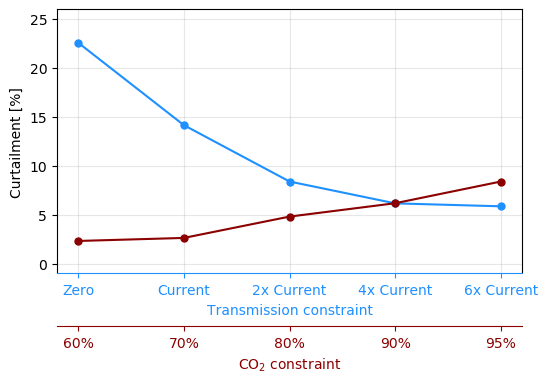

In [7]:
fig, ax = plt.subplots(figsize=(6,3.5), dpi=100)
print("Total average curtailment of renewable generation relative to the load as a function of network constraints")

# Constraint names of system (transmission)
constraintsTransmission = ['Zero', 'Current', '2x Current', '4x Current', '6x Current']
plt.xticks(np.arange(len(constraintsTransmission)), constraintsTransmission)
plt.plot(totalDispatchTransLoad, color="dodgerblue", marker='o', markerfacecolor="dodgerblue", markersize=5)
plt.grid(alpha=0.3)
ax.set_xlabel(r"Transmission constraint")

# Constraint names of system (CO2)
constraintsCO2 = ['40%', '50%', '60%', '70%', '80%', '90%', '95%']
plt.plot(totalDispatchCO2Load[2:], color="darkred", marker='o', markerfacecolor="darkred", markersize=5)
plt.ylabel("Curtailment [%]")
plt.grid(alpha=0.3)

## Second x-axis:
ax2 = ax.twiny()
ax2.xaxis.set_ticks_position("bottom")
ax2.xaxis.set_label_position("bottom")
# Offset the twin axis below the host
ax2.spines["bottom"].set_position(("axes", -0.2))
ax2.set_frame_on(True)
ax2.patch.set_visible(False)
for sp in ax2.spines.values():
    sp.set_visible(False)
ax2.spines["bottom"].set_visible(True)
# Set ticks and labels
ax2.set_xticks(np.arange(len(constraintsCO2[2:])))
ax2.set_xticklabels(constraintsCO2[2:])
ax2.set_xlim(ax.get_xlim())
ax2.set_xlabel(r"CO$_2$ constraint")

ax.xaxis.label.set_color("dodgerblue")
ax2.xaxis.label.set_color("darkred")
ax.spines["bottom"].set_edgecolor("dodgerblue")
ax2.spines["bottom"].set_edgecolor("darkred")
ax.tick_params(axis='x', colors="dodgerblue")
ax2.tick_params(axis='x', colors="darkred")
plt.ylim([-1,26]);

## Mismatch variance figure

In [10]:
#%% Functions
def MatrixSorter(names,matrix):
    # Define output
    sortedMatrix = []        
    for i in names:
        # create empty list
        newMatrix = pd.DataFrame(data = np.zeros([len(matrix)]))
        for j in range(len(matrix)):
            newMatrix.T[j] = matrix[j][i]
        # Save into matrix
        sortedMatrix.append(newMatrix)
    return sortedMatrix

In [12]:
def GeneratorSplit(network, generatorType):
    """
    Parameters
    ----------
    network : PyPSA network
        Index of all the countries, for this project its 30 countries
    generatorType: string
        Name of the generator 
    
    Returns
    -------
    generator : Panda Dataframe
    """
    country_column = network.loads.index[:30]
    generatorIndex = network.generators.index
    generatorsTimeData = network.generators_t.p
    generator = pd.DataFrame(np.zeros([8760, 30]), columns=country_column) # Create empty dataframe
    count = 0 # Add a counter
    for j in generatorIndex: # Search through all generator types
        value = np.array(generatorsTimeData)[:,count] # Save the current generator value
        if len(j) <= len(generatorType)+7:
            if (j[-(len(generatorType)):] == generatorType): # If the generator type is equal to the current generator
                generator[j[0:2]] = generator[j[0:2]] + value # Save the value for the country
        count += 1 # Add one to the counter
    return generator 

In [14]:
def ElecResponse(network, collectTerms=True):
    # Save index with only countries
    country_column = network.loads.index[:30]
    # Determin size of loads to know if the system includes heat and/or transport
    size = network.loads.index.size
    # Find efficency of links
    busEff = LinksEff(network)
    # Check if brownfield network
    isBrownfield = len([x for x in network.links_t.p0.columns if "nuclear" in x]) > 0
    if isBrownfield == True: 
        size = 0 # Makes use that the sector coupled links are correct 
    # General Reponse
    H2                          = pd.DataFrame(data=np.zeros([8760,30]),columns=country_column)
    battery                     = pd.DataFrame(data=np.zeros([8760,30]),columns=country_column)
    PHS                         = pd.DataFrame(data=np.zeros([8760,30]),columns=country_column)
    importExport                = pd.DataFrame(data=np.zeros([8760,30]),columns=country_column)
    OCGT                        = pd.DataFrame(data=np.zeros([8760,30]),columns=country_column)
    hydro                       = pd.DataFrame(data=np.zeros([8760,30]),columns=country_column)
    if isBrownfield == False:
        # Heating related response:
        if size >= 90:
            groundHeatPump              = pd.DataFrame(data=np.zeros([8760,30]),columns=country_column)
            centralUrbanHeatPump        = pd.DataFrame(data=np.zeros([8760,30]),columns=country_column)
            ResistiveHeater             = pd.DataFrame(data=np.zeros([8760,30]),columns=country_column)
            centralUrbanResistiveHeater = pd.DataFrame(data=np.zeros([8760,30]),columns=country_column)
            CHPElec                     = pd.DataFrame(data=np.zeros([8760,30]),columns=country_column)
        # Transportation related response
        if size == 60 or size == 120:
            EVBattery                   = pd.DataFrame(data=np.zeros([8760,30]),columns=country_column)
    elif isBrownfield == True:
        # new types of backup
        CCGT                        = pd.DataFrame(data=np.zeros([8760,30]),columns=country_column)
        coal                        = pd.DataFrame(data=np.zeros([8760,30]),columns=country_column)
        lignite                     = pd.DataFrame(data=np.zeros([8760,30]),columns=country_column)
        nuclear                     = pd.DataFrame(data=np.zeros([8760,30]),columns=country_column)
        oil                         = pd.DataFrame(data=np.zeros([8760,30]),columns=country_column)
        biomassEOP                  = pd.DataFrame(data=np.zeros([8760,30]),columns=country_column)
        # Heat related
        groundHeatPump              = pd.DataFrame(data=np.zeros([8760,30]),columns=country_column)
        centralUrbanHeatPump        = pd.DataFrame(data=np.zeros([8760,30]),columns=country_column)
        ResistiveHeater             = pd.DataFrame(data=np.zeros([8760,30]),columns=country_column)
        centralUrbanResistiveHeater = pd.DataFrame(data=np.zeros([8760,30]),columns=country_column)
        coolingPump                 = pd.DataFrame(data=np.zeros([8760,30]),columns=country_column)
        gasCHPElec                  = pd.DataFrame(data=np.zeros([8760,30]),columns=country_column)
        biomassCHPElec              = pd.DataFrame(data=np.zeros([8760,30]),columns=country_column)

    for country in country_column:
        # Storage
        H2[country] = (- network.links_t.p0.filter(regex=country).filter(regex="Electrolysis")
            + network.links_t.p0.filter(regex=country).filter(regex="H2 Fuel Cell").values
            * busEff.loc["H2 Fuel Cell"].values[0]).values 
        battery[country] = (- network.links_t.p0.filter(regex=country).filter(regex="battery charger")
                  + network.links_t.p0.filter(regex=country).filter(regex="battery discharger").values
                  * busEff.loc["battery discharger"].values[0]).values
        if (+ network.storage_units_t.p.filter(regex=country).filter(regex="PHS")).size > 0:
            PHS[country] = (+ network.storage_units_t.p.filter(regex=country).filter(regex="PHS")).values
        # Import/export
        if network.links_t.p0.filter(regex=country).filter(regex=str(country)+"-").groupby(network.links.bus0.str.slice(0,2), axis=1).sum().size > 0:
            Import = (+ network.links_t.p0.filter(regex=country).filter(regex=str(country)+"-").groupby(network.links.bus0.str.slice(0,2), axis=1).sum()).values
        else:
            Import = np.zeros([8760,1])
        if network.links_t.p0.filter(regex=country).filter(regex="-"+str(country)).groupby(network.links.bus0.str.slice(0,2), axis=1).sum().size > 0:
            Export = (- network.links_t.p0.filter(regex=country).filter(regex="-"+str(country)).groupby(network.links.bus1.str.slice(0,2), axis=1).sum()).values
        else:
            Export = np.zeros([8760,1])  
        importExport[country] = Import + Export
    
        # Backup generator
        OCGT[country] = ( + network.links_t.p0.filter(regex=country).filter(regex="OCGT").values
                * busEff.loc["OCGT"].values[0]
                )
        # dispathable backup generator
        if (+ network.storage_units_t.p.filter(regex=country).filter(regex="hydro")).size > 0:
            hydro[country] = (+ network.storage_units_t.p.filter(regex=country).filter(regex="hydro")).values
        
        # Heating related response:
        if size >= 90:
            # Sector links to Heat
            groundHeatPump[country] = ( + network.links_t.p0.filter(regex=country).filter(regex="ground heat pump").groupby(network.links.bus0.str.slice(0,2), axis=1).sum() ).values
            if (network.links_t.p1.filter(regex=country).filter(regex="central heat pump")).size > 0:
                centralUrbanHeatPump[country] = (network.links_t.p0.filter(regex=country).filter(regex="central heat pump")).values
            else:
                centralUrbanHeatPump[country] = (network.links_t.p0.filter(regex=country).filter(regex="urban heat pump")).values
            ResistiveHeater[country] = ( + network.links_t.p0.filter(regex=country).filter(regex=str(country)+" resistive heater") ).values
            if (network.links_t.p1.filter(regex=country).filter(regex="central resistive heater")).size > 0:
                centralUrbanResistiveHeater[country] = (network.links_t.p0.filter(regex=country).filter(regex="central resistive heater")).values
            else:
                centralUrbanResistiveHeater[country] = (network.links_t.p0.filter(regex=country).filter(regex="urban resistive heater")).values
            # CHP
            if ( + network.links_t.p0.filter(regex=str(country)+" ").filter(regex="CHP electric")).size > 0:
                CHPElec[country] = ( + network.links_t.p0.filter(regex=str(country)+" ").filter(regex="central CHP electric").values
                       * busEff.loc["central CHP electric"].values[0])
        
        # Transportation related response
        if size == 60 or size == 120:
            # Sector links to vehicle
            EVBattery[country] = (- network.links_t.p0.filter(regex=str(country)+" ").filter(regex="BEV")
                - network.links_t.p1.filter(regex=country).filter(regex="V2G").values).values      

        # Brownfield related response
        if isBrownfield == True: 
            # Backup generator
            CCGT[country] = ( + network.links_t.p0.filter(regex=country).filter(regex="CCGT").values
                    * busEff.loc["CCGT"].values[0]
                    )
            oil[country] = ( + network.links_t.p0.filter(regex=country).filter(regex=" oil").values
                    * busEff.loc["oil"].values[0]
                    )
            coal[country] = ( + network.links_t.p0.filter(regex=country).filter(regex="coal").values
                    * busEff.loc["coal"].values[0]
                    )
            lignite[country] = ( + network.links_t.p0.filter(regex=country).filter(regex="lignite").values
                    * busEff.loc["lignite"].values[0]
                    )
            nuclear[country] = ( + network.links_t.p0.filter(regex=country).filter(regex="nuclear").values
                    * busEff.loc["nuclear"].values[0]
                    )
            biomassEOP[country] = ( + network.links_t.p0.filter(regex=country).filter(regex="EOP").values
                    * busEff.loc["biomass EOP"].values[0]
                    )
            # Sector links to Heat
            groundHeatPump[country] = ( + network.links_t.p0.filter(regex=country).filter(regex="decentral heat pump").groupby(network.links.bus0.str.slice(0,2), axis=1).sum() ).values
            
            if (network.links_t.p1.filter(regex=country).filter(regex="central heat pump")).size > 0:
                centralUrbanHeatPump[country] = (network.links_t.p0.filter(regex=country).filter(regex="central heat pump")).values
            else:
                centralUrbanHeatPump[country] = (network.links_t.p0.filter(regex=country).filter(regex="urban heat pump")).values
            
            ResistiveHeater[country] = ( + network.links_t.p0.filter(regex=country).filter(regex=str(country)+" decentral resistive heater") ).values
           
            if (network.links_t.p1.filter(regex=country).filter(regex="central resistive heater")).size > 0:
                centralUrbanResistiveHeater[country] = (network.links_t.p0.filter(regex=country).filter(regex="central resistive heater")).values
            else:
                centralUrbanResistiveHeater[country] = (network.links_t.p0.filter(regex=country).filter(regex="urban resistive heater")).values

            coolingPump[country] = ( + network.links_t.p0.filter(regex=country).filter(regex="cooling pump").groupby(network.links.bus0.str.slice(0,2), axis=1).sum() ).values
                
            # CHP
            if ( + network.links_t.p0.filter(regex=str(country)+" ").filter(regex="gas CHP electric")).size > 0:
                gasCHPElec[country] = ( + network.links_t.p0.filter(regex=str(country)+" ").filter(regex="central gas CHP electric").values
                       * busEff.loc["central gas CHP electric"].values[0]
                       )        
            if ( + network.links_t.p0.filter(regex=str(country)+" ").filter(regex="biomass CHP electric")).size > 0:
                biomassCHPElec[country] = ( + network.links_t.p0.filter(regex=str(country)+" ").filter(regex="central biomass CHP electric").values
                       * busEff.loc["central biomass CHP electric"].values[0]
                       )  
       
    storage = + H2 + battery.values + PHS.values
    importExport = - importExport
    backupGenerator = OCGT
    dispBackupGenerator = hydro
    if size >= 90:
        heatCouple = - groundHeatPump - centralUrbanHeatPump.values - ResistiveHeater.values - centralUrbanResistiveHeater.values
        CHP = CHPElec
    if size == 60 or size == 120:
        transCouple = EVBattery
    if isBrownfield == True:  
        backupGenerator = OCGT + CCGT + coal.values + lignite.values + nuclear.values + oil.values + biomassEOP.values
        heatCouple = - groundHeatPump - centralUrbanHeatPump.values - ResistiveHeater.values - centralUrbanResistiveHeater.values - coolingPump.values
        CHP = gasCHPElec + biomassCHPElec.values
    if isBrownfield == False:
        if collectTerms == True: # Collecting into general terms
            if size == 60: # elec + transport
                collectedResponse = {"storage":                         + storage, 
                                     "import-export":                   + importExport,
                                     "backup generator":                + backupGenerator,
                                     "Hydro reservoir":                 + dispBackupGenerator,
                                     "transport couple":                + transCouple
                                     }
            elif size == 90: # elec + heating
                collectedResponse = {"storage":                         + storage, 
                                     "import-export":                   + importExport,
                                     "backup generator":                + backupGenerator,
                                     "Hydro reservoir":                 + dispBackupGenerator,
                                     "heat couple":                     + heatCouple,
                                     "CHP":                             + CHP
                                     }
            elif size == 120: # elec + heating + transport
                collectedResponse = {"storage":                         + storage, 
                                     "import-export":                   + importExport,
                                     "backup generator":                + backupGenerator,
                                     "Hydro reservoir":                 + dispBackupGenerator,
                                     "heat couple":                     + heatCouple,
                                     "transport couple":                + transCouple,
                                     "CHP":                             + CHP
                                     }   
            else: # elec only
                collectedResponse = {"storage":                         + storage, 
                                     "import-export":                   + importExport,
                                     "backup generator":                + backupGenerator,
                                     "dispatchable\nbackup generator":   + dispBackupGenerator
                                     }
    
        elif collectTerms == False: # Collecting into general terms
            if size == 60: # elec + transport
                collectedResponse = {"H2":                              + H2, 
                                     "battery":                         + battery,
                                     "PHS":                             + PHS,
                                     "import-export":                   + importExport,
                                     "OCGT":                            + OCGT,
                                     "hydro":                           + hydro,
                                     "EV battery":                      + EVBattery
                                     }
            elif size == 90: # elec + heating
                collectedResponse = {"H2":                              + H2, 
                                     "battery":                         + battery,
                                     "PHS":                             + PHS,
                                     "import-export":                   + importExport,
                                     "OCGT":                            + OCGT,
                                     "hydro":                           + hydro,
                                     "ground heat pump":                - groundHeatPump,
                                     "central-urban heat pump":         - centralUrbanHeatPump,
                                     "resistive heater":                - ResistiveHeater,
                                     "central-urban resistive heater":  - centralUrbanResistiveHeater,
                                     "CHP electric":                    + CHPElec
                                     }
            elif size == 120: # elec + heating + transport
                collectedResponse = {"H2":                              + H2, 
                                     "battery":                         + battery,
                                     "PHS":                             + PHS,
                                     "import-export":                   + importExport,
                                     "OCGT":                            + OCGT,
                                     "hydro":                           + hydro,
                                     "ground heat pump":                - groundHeatPump,
                                     "central-urban heat pump":         - centralUrbanHeatPump,
                                     "resistive heater":                - ResistiveHeater,
                                     "central-urban resistive heater":  - centralUrbanResistiveHeater,
                                     "EV battery":                      + EVBattery,
                                     "CHP electric":                    + CHPElec
                                    }   
            else: # elec only
                collectedResponse = {"H2":                              + H2, 
                                     "battery":                         + battery,
                                     "PHS":                             + PHS,
                                     "import-export":                   + importExport,
                                     "OCGT":                            + OCGT,
                                     "hydro":                           + hydro
                                    }
    if isBrownfield == True:
        if collectTerms == True: # Collecting into general terms
            collectedResponse = {"storage":                         + storage, 
                                 "import-export":                   + importExport,
                                 "backup generator":                + backupGenerator,
                                 "Hydro reservoir":                 + dispBackupGenerator,
                                 "heat couple":                     + heatCouple,
                                 "CHP":                             + CHP
                                 }
        elif collectTerms == False: # Collecting into general terms
            collectedResponse = {"H2":                              + H2, 
                                 "battery":                         + battery,
                                 "PHS":                             + PHS,
                                 "import-export":                   + importExport,
                                 "OCGT":                            + OCGT,
                                 "CCGT":                            + CCGT,
                                 "coal":                            + coal,
                                 "lignite":                         + lignite,
                                 "nuclear":                         + nuclear,
                                 "oil":                             + oil,
                                 "biomass EOP":                     + biomassEOP,
                                 "hydro":                           + hydro,
                                 "ground heat pump":                - groundHeatPump,
                                 "central-urban heat pump":         - centralUrbanHeatPump,
                                 "resistive heater":                - ResistiveHeater,
                                 "central-urban resistive heater":  - centralUrbanResistiveHeater,
                                 "cooling pump":                    - coolingPump,
                                 "gas CHP electric":                + gasCHPElec,
                                 "biomass CHP electric":            + biomassCHPElec,
                         }
    return collectedResponse

In [16]:
def LinksEff(network):
    """
    Parameters
    ----------
    network : PyPSA network type
        input network

    Returns
    -------
    linkseff : array
        an array of the types of links that have an efficency. Used to calculate the response values
    """
    linkseff = network.links # Save link data
    linkseff = linkseff.drop(linkseff.index[np.where(linkseff["bus1"].str.contains("H2"))]) # Delete bus1 = H2
    linkseff = linkseff.drop(linkseff.index[np.where(linkseff["bus1"].str.contains("battery"))]) # Delete bus1 = battery
    linkseff = linkseff.drop(linkseff.index[np.where(linkseff["bus1"].str.contains("water"))]) # Delete bus1 = water tanks
    linkseff = pd.DataFrame(data={"eff": linkseff.efficiency.values}, index=linkseff.index.str.slice(3))
    linkseff = linkseff[~linkseff.index.duplicated(keep='first')]
    linkseff = linkseff[:np.where(linkseff.index.str.len()==2)[0][0]]
    return linkseff

In [ ]:
#%% Import Data
# CO2 CONSTRAINTS
# Load data - CO2 constraint
# Name of file (must be in correct folder location)
filename_CO2 = ["postnetwork-elec_only_0.125_0.6.h5",
                "postnetwork-elec_only_0.125_0.5.h5",
                "postnetwork-elec_only_0.125_0.4.h5",
                "postnetwork-elec_only_0.125_0.3.h5",
                "postnetwork-elec_only_0.125_0.2.h5",
                "postnetwork-elec_only_0.125_0.1.h5",
                "postnetwork-elec_only_0.125_0.05.h5"]
filename_links =   ["postnetwork-elec_only_0_0.05.h5",
                    "postnetwork-elec_only_0.0625_0.05.h5",
                    "postnetwork-elec_only_0.125_0.05.h5",
                    "postnetwork-elec_only_0.25_0.05.h5",
                    "postnetwork-elec_only_0.375_0.05.h5"]
# Network
network = pypsa.Network(directory+filename_CO2[-1])

#%% Define index and columns
# Index
timeIndex = network.loads_t.p_set.index 
# Columns
countryColumn = network.loads.index[:30]
#%% Networks
varMismatchChangeCO2 = []
varChangeCO2 = []
varResponseChangeCO2 = []
covChangeCO2 = []

for networks in filename_CO2:
    network = pypsa.Network(directory+networks)
    
    #%% mismatch
    generatorWind = GeneratorSplit(network,"wind").values
    generatorSolar = GeneratorSplit(network,"solar").values
    generatorRor = GeneratorSplit(network,"ror").values
    load = network.loads_t.p_set[network.loads.index[:30]].values
    mismatch = generatorWind + generatorSolar + generatorRor - load
    
    #%% Mismatch Variance
    varMismatch = sum(np.mean((mismatch - np.mean(mismatch, axis=0))**2, axis=0))
    varMismatchChangeCO2.append(varMismatch)
    
    #%% Split variance
    varWind = sum(np.mean((generatorWind - np.mean(generatorWind, axis=0))**2, axis=0))
    varSolar = sum(np.mean((generatorSolar - np.mean(generatorSolar, axis=0))**2, axis=0))
    varRor = sum(np.mean((generatorRor - np.mean(generatorRor, axis=0))**2, axis=0))
    varLoad = sum(np.mean((load - np.mean(load, axis=0))**2, axis=0))
    
    #%% Covariance 
    covWindSolar    = 2* sum(np.mean((generatorWind - np.mean(generatorWind, axis=0))*(generatorSolar - np.mean(generatorSolar, axis=0)), axis=0))
    covWindRor      = 2* sum(np.mean((generatorWind - np.mean(generatorWind, axis=0))*(generatorRor - np.mean(generatorRor, axis=0)), axis=0))
    covSolarRor     = 2* sum(np.mean((generatorSolar - np.mean(generatorSolar, axis=0))*(generatorRor - np.mean(generatorRor, axis=0)), axis=0))
    covWindLoad     = 2* sum(np.mean((-load - np.mean(-load, axis=0))*(generatorWind - np.mean(generatorWind, axis=0)), axis=0))
    covSolarLoad    = 2* sum(np.mean((-load - np.mean(-load, axis=0))*(generatorSolar - np.mean(generatorSolar, axis=0)), axis=0))
    covRorLoad      = 2* sum(np.mean((-load - np.mean(-load, axis=0))*(generatorRor - np.mean(generatorRor, axis=0)), axis=0))
    
    #%% Save values
    varMismatchSplit = {"wind":        varWind,
                        "solar":        varSolar,
                        "ror":          varRor,
                        "load":         varLoad,
                        "wind\nsolar":  covWindSolar,
                        "wind\nror":    covWindRor,
                        "solar\nror":   covSolarRor,
                        "wind\nload":   covWindLoad,
                        "solar\nload":  covSolarLoad,
                        "ror\nload":    covRorLoad}
    varChangeCO2.append(varMismatchSplit)

    #%% Find backup
    response = ElecResponse(network,True)

    #%% backup variance
    varStorage = sum(np.mean((response["storage"] - np.mean(response["storage"], axis=0))**2, axis=0))
    varLinks = sum(np.mean((response["import-export"] - np.mean(response["import-export"], axis=0))**2, axis=0))
    varDisp = sum(np.mean((response["dispatchable\nbackup generator"] - np.mean(response["dispatchable\nbackup generator"], axis=0))**2, axis=0))
    varBackup = sum(np.mean((response["backup generator"] - np.mean(response["backup generator"], axis=0))**2, axis=0))

    #%% backup Covariance
    covStorageLinks     = 2* sum(np.mean((response["storage"] - np.mean(response["storage"], axis=0))*(response["import-export"] - np.mean(response["import-export"], axis=0)), axis=0))
    covStorageDisp      = 2* sum(np.mean((response["storage"] - np.mean(response["storage"], axis=0))*(response["dispatchable\nbackup generator"] - np.mean(response["dispatchable\nbackup generator"], axis=0)), axis=0))
    covStorageBackup    = 2* sum(np.mean((response["storage"] - np.mean(response["storage"], axis=0))*(response["backup generator"] - np.mean(response["backup generator"], axis=0)), axis=0))
    covLinksDisp        = 2* sum(np.mean((response["import-export"] - np.mean(response["import-export"], axis=0))*(response["dispatchable\nbackup generator"] - np.mean(response["dispatchable\nbackup generator"], axis=0)), axis=0))
    covLinksBackup      = 2* sum(np.mean((response["import-export"] - np.mean(response["import-export"], axis=0))*(response["backup generator"] - np.mean(response["backup generator"], axis=0)), axis=0))
    covDispBackup       = 2* sum(np.mean((response["dispatchable\nbackup generator"] - np.mean(response["dispatchable\nbackup generator"], axis=0))*(response["backup generator"] - np.mean(response["backup generator"], axis=0)), axis=0))
    
    #%% Save values
    varMismatchSplit = {"storage":              varStorage,
                        "links":                varLinks,
                        "dispatch":             varDisp,
                        "backup":               varBackup,
                        "storage\nlinks":       covStorageLinks,
                        "storage\ndispatch":    covStorageDisp,
                        "storage\nbackup":      covStorageBackup,
                        "links\ndispatch":      covLinksDisp,
                        "links\nbackup":        covLinksBackup,
                        "dispatch\nbackup":     covDispBackup }
    varResponseChangeCO2.append(varMismatchSplit)

    #%% Generation & Storage covariance
    covWindStorage  = - sum(np.mean((generatorWind - np.mean(generatorWind, axis=0))*(response["storage"] - np.mean(response["storage"], axis=0)), axis=0))
    covWindLinks    = - sum(np.mean((generatorWind - np.mean(generatorWind, axis=0))*(response["import-export"] - np.mean(response["import-export"], axis=0)), axis=0))
    covWindDisp     = - sum(np.mean((generatorWind - np.mean(generatorWind, axis=0))*(response["dispatchable\nbackup generator"] - np.mean(response["dispatchable\nbackup generator"], axis=0)), axis=0))
    covWindBackup   = - sum(np.mean((generatorWind - np.mean(generatorWind, axis=0))*(response["backup generator"] - np.mean(response["backup generator"], axis=0)), axis=0))
    
    covSolarStorage = - sum(np.mean((generatorSolar - np.mean(generatorSolar, axis=0))*(response["storage"] - np.mean(response["storage"], axis=0)), axis=0))
    covSolarLinks   = - sum(np.mean((generatorSolar - np.mean(generatorSolar, axis=0))*(response["import-export"] - np.mean(response["import-export"], axis=0)), axis=0))
    covSolarDisp    = - sum(np.mean((generatorSolar - np.mean(generatorSolar, axis=0))*(response["dispatchable\nbackup generator"] - np.mean(response["dispatchable\nbackup generator"], axis=0)), axis=0))
    covSolarBackup  = - sum(np.mean((generatorSolar - np.mean(generatorSolar, axis=0))*(response["backup generator"] - np.mean(response["backup generator"], axis=0)), axis=0))
    
    covRorStorage   = - sum(np.mean((generatorRor - np.mean(generatorRor, axis=0))*(response["storage"] - np.mean(response["storage"], axis=0)), axis=0))
    covRorLinks     = - sum(np.mean((generatorRor - np.mean(generatorRor, axis=0))*(response["import-export"] - np.mean(response["import-export"], axis=0)), axis=0))
    covRorDisp      = - sum(np.mean((generatorRor - np.mean(generatorRor, axis=0))*(response["dispatchable\nbackup generator"] - np.mean(response["dispatchable\nbackup generator"], axis=0)), axis=0))
    covRorBackup    = - sum(np.mean((generatorRor - np.mean(generatorRor, axis=0))*(response["backup generator"] - np.mean(response["backup generator"], axis=0)), axis=0))
    
    covLoadStorage  = - sum(np.mean((-load - np.mean(-load, axis=0))*(response["storage"] - np.mean(response["storage"], axis=0)), axis=0))
    covLoadLinks    = - sum(np.mean((-load - np.mean(-load, axis=0))*(response["import-export"] - np.mean(response["import-export"], axis=0)), axis=0))
    covLoadDisp     = - sum(np.mean((-load - np.mean(-load, axis=0))*(response["dispatchable\nbackup generator"] - np.mean(response["dispatchable\nbackup generator"], axis=0)), axis=0))
    covLoadBackup   = - sum(np.mean((-load - np.mean(-load, axis=0))*(response["backup generator"] - np.mean(response["backup generator"], axis=0)), axis=0))
     
    #%% Save cov values
    covMismatchSplit = {"wind\nstorage":        covWindStorage,
                        "wind\nlinks":          covWindLinks,
                        "wind\ndispatch":       covWindDisp,
                        "wind\nbackup":         covWindBackup,
                        "solar\nstorage":       covSolarStorage,
                        "solar\nlinks":         covSolarLinks,
                        "solar\ndispatch":      covSolarDisp,
                        "solar\nbackup":        covSolarBackup,
                        "ror\nstorage":         covRorStorage,
                        "ror\nlinks":           covRorLinks,
                        "ror\ndispatch":        covRorDisp,
                        "ror\nbackup":          covRorBackup,
                        "load\nstorage":        covLoadStorage,
                        "load\nlinks":          covLoadLinks,
                        "load\ndispatch":       covLoadDisp,
                        "load\nbackup":         covLoadBackup}
    covChangeCO2.append(covMismatchSplit)

In [ ]:
#%% Networks
varMismatchChangeLinks = []
varChangeLinks = []
varResponseChangeLinks = []
covChangeLinks = []

for networks in filename_links:
    network = pypsa.Network(directory+networks)
    
    #%% mismatch
    generatorWind = GeneratorSplit(network,"wind").values
    generatorSolar = GeneratorSplit(network,"solar").values
    generatorRor = GeneratorSplit(network,"ror").values
    load = network.loads_t.p_set[network.loads.index[:30]].values
    mismatch = generatorWind + generatorSolar + generatorRor - load
    
    #%% Mismatch Variance
    varMismatch = sum(np.mean((mismatch - np.mean(mismatch, axis=0))**2, axis=0))
    varMismatchChangeLinks.append(varMismatch)
    
    #%% Split variance
    varWind = sum(np.mean((generatorWind - np.mean(generatorWind, axis=0))**2, axis=0))
    varSolar = sum(np.mean((generatorSolar - np.mean(generatorSolar, axis=0))**2, axis=0))
    varRor = sum(np.mean((generatorRor - np.mean(generatorRor, axis=0))**2, axis=0))
    varLoad = sum(np.mean((load - np.mean(load, axis=0))**2, axis=0))
    
    #%% Covariance 
    covWindSolar    = 2* sum(np.mean((generatorWind - np.mean(generatorWind, axis=0))*(generatorSolar - np.mean(generatorSolar, axis=0)), axis=0))
    covWindRor      = 2* sum(np.mean((generatorWind - np.mean(generatorWind, axis=0))*(generatorRor - np.mean(generatorRor, axis=0)), axis=0))
    covSolarRor     = 2* sum(np.mean((generatorSolar - np.mean(generatorSolar, axis=0))*(generatorRor - np.mean(generatorRor, axis=0)), axis=0))
    covWindLoad     = 2* sum(np.mean((-load - np.mean(-load, axis=0))*(generatorWind - np.mean(generatorWind, axis=0)), axis=0))
    covSolarLoad    = 2* sum(np.mean((-load - np.mean(-load, axis=0))*(generatorSolar - np.mean(generatorSolar, axis=0)), axis=0))
    covRorLoad      = 2* sum(np.mean((-load - np.mean(-load, axis=0))*(generatorRor - np.mean(generatorRor, axis=0)), axis=0))
    
    #%% Save values
    varMismatchSplit = {"wind":         varWind,
                        "solar":        varSolar,
                        "ror":          varRor,
                        "load":         varLoad,
                        "wind\nsolar":  covWindSolar,
                        "wind\nror":    covWindRor,
                        "solar\nror":   covSolarRor,
                        "wind\nload":   covWindLoad,
                        "solar\nload":  covSolarLoad,
                        "ror\nload":    covRorLoad }
    varChangeLinks.append(varMismatchSplit)

    #%% Find backup
    response = ElecResponse(network,True)

    #%% backup variance
    varStorage = sum(np.mean((response["storage"] - np.mean(response["storage"], axis=0))**2, axis=0))
    varLinks = sum(np.mean((response["import-export"] - np.mean(response["import-export"], axis=0))**2, axis=0))
    varDisp = sum(np.mean((response["dispatchable\nbackup generator"] - np.mean(response["dispatchable\nbackup generator"], axis=0))**2, axis=0))
    varBackup = sum(np.mean((response["backup generator"] - np.mean(response["backup generator"], axis=0))**2, axis=0))

    #%% backup Covariance
    covStorageLinks     = 2* sum(np.mean((response["storage"] - np.mean(response["storage"], axis=0))*(response["import-export"] - np.mean(response["import-export"], axis=0)), axis=0))
    covStorageDisp      = 2* sum(np.mean((response["storage"] - np.mean(response["storage"], axis=0))*(response["dispatchable\nbackup generator"] - np.mean(response["dispatchable\nbackup generator"], axis=0)), axis=0))
    covStorageBackup    = 2* sum(np.mean((response["storage"] - np.mean(response["storage"], axis=0))*(response["backup generator"] - np.mean(response["backup generator"], axis=0)), axis=0))
    covLinksDisp        = 2* sum(np.mean((response["import-export"] - np.mean(response["import-export"], axis=0))*(response["dispatchable\nbackup generator"] - np.mean(response["dispatchable\nbackup generator"], axis=0)), axis=0))
    covLinksBackup      = 2* sum(np.mean((response["import-export"] - np.mean(response["import-export"], axis=0))*(response["backup generator"] - np.mean(response["backup generator"], axis=0)), axis=0))
    covDispBackup       = 2* sum(np.mean((response["dispatchable\nbackup generator"] - np.mean(response["dispatchable\nbackup generator"], axis=0))*(response["backup generator"] - np.mean(response["backup generator"], axis=0)), axis=0))
    
    #%% Save values
    varMismatchSplit = {"storage":              varStorage,
                        "links":                varLinks,
                        "dispatch":             varDisp,
                        "backup":               varBackup,
                        "storage\nlinks":       covStorageLinks,
                        "storage\ndispatch":    covStorageDisp,
                        "storage\nbackup":      covStorageBackup,
                        "links\ndispatch":      covLinksDisp,
                        "links\nbackup":        covLinksBackup,
                        "dispatch\nbackup":     covDispBackup}
    varResponseChangeLinks.append(varMismatchSplit)

    #%% Generation & Storage covariance
    covWindStorage  = - sum(np.mean((generatorWind - np.mean(generatorWind, axis=0))*(response["storage"] - np.mean(response["storage"], axis=0)), axis=0))
    covWindLinks    = - sum(np.mean((generatorWind - np.mean(generatorWind, axis=0))*(response["import-export"] - np.mean(response["import-export"], axis=0)), axis=0))
    covWindDisp     = - sum(np.mean((generatorWind - np.mean(generatorWind, axis=0))*(response["dispatchable\nbackup generator"] - np.mean(response["dispatchable\nbackup generator"], axis=0)), axis=0))
    covWindBackup   = - sum(np.mean((generatorWind - np.mean(generatorWind, axis=0))*(response["backup generator"] - np.mean(response["backup generator"], axis=0)), axis=0))
    
    covSolarStorage = - sum(np.mean((generatorSolar - np.mean(generatorSolar, axis=0))*(response["storage"] - np.mean(response["storage"], axis=0)), axis=0))
    covSolarLinks   = - sum(np.mean((generatorSolar - np.mean(generatorSolar, axis=0))*(response["import-export"] - np.mean(response["import-export"], axis=0)), axis=0))
    covSolarDisp    = - sum(np.mean((generatorSolar - np.mean(generatorSolar, axis=0))*(response["dispatchable\nbackup generator"] - np.mean(response["dispatchable\nbackup generator"], axis=0)), axis=0))
    covSolarBackup  = - sum(np.mean((generatorSolar - np.mean(generatorSolar, axis=0))*(response["backup generator"] - np.mean(response["backup generator"], axis=0)), axis=0))
    
    covRorStorage   = - sum(np.mean((generatorRor - np.mean(generatorRor, axis=0))*(response["storage"] - np.mean(response["storage"], axis=0)), axis=0))
    covRorLinks     = - sum(np.mean((generatorRor - np.mean(generatorRor, axis=0))*(response["import-export"] - np.mean(response["import-export"], axis=0)), axis=0))
    covRorDisp      = - sum(np.mean((generatorRor - np.mean(generatorRor, axis=0))*(response["dispatchable\nbackup generator"] - np.mean(response["dispatchable\nbackup generator"], axis=0)), axis=0))
    covRorBackup    = - sum(np.mean((generatorRor - np.mean(generatorRor, axis=0))*(response["backup generator"] - np.mean(response["backup generator"], axis=0)), axis=0))
    
    covLoadStorage  = - sum(np.mean((-load - np.mean(-load, axis=0))*(response["storage"] - np.mean(response["storage"], axis=0)), axis=0))
    covLoadLinks    = - sum(np.mean((-load - np.mean(-load, axis=0))*(response["import-export"] - np.mean(response["import-export"], axis=0)), axis=0))
    covLoadDisp     = - sum(np.mean((-load - np.mean(-load, axis=0))*(response["dispatchable\nbackup generator"] - np.mean(response["dispatchable\nbackup generator"], axis=0)), axis=0))
    covLoadBackup   = - sum(np.mean((-load - np.mean(-load, axis=0))*(response["backup generator"] - np.mean(response["backup generator"], axis=0)), axis=0))
    
    #%% Save cov values
    covMismatchSplit = {"wind\nstorage":        covWindStorage,
                        "wind\nlinks":          covWindLinks,
                        "wind\ndispatch":       covWindDisp,
                        "wind\nbackup":         covWindBackup,
                        "solar\nstorage":       covSolarStorage,
                        "solar\nlinks":         covSolarLinks,
                        "solar\ndispatch":      covSolarDisp,
                        "solar\nbackup":        covSolarBackup,
                        "ror\nstorage":         covRorStorage,
                        "ror\nlinks":           covRorLinks,
                        "ror\ndispatch":        covRorDisp,
                        "ror\nbackup":          covRorBackup,
                        "load\nstorage":        covLoadStorage,
                        "load\nlinks":          covLoadLinks,
                        "load\ndispatch":       covLoadDisp,
                        "load\nbackup":         covLoadBackup}
    covChangeLinks.append(covMismatchSplit)

In [19]:
#%% Sort matrix
# CO2 mismatch
names = list(varChangeCO2[0].keys())
sortedMatrixCO2 = MatrixSorter(names,varChangeCO2)
sortedMatrixLinks = MatrixSorter(names,varChangeLinks)

# CO2 response
names = list(varResponseChangeCO2[0].keys())
sortedMatrixResponseCO2 = MatrixSorter(names,varResponseChangeCO2)
sortedMatrixResponseLinks = MatrixSorter(names,varResponseChangeLinks)

# CO2 Covariance
names = list(covChangeCO2[0].keys())
sortedMatrixCovarianceCO2 = MatrixSorter(names,covChangeCO2)
sortedMatrixCovarianceLinks = MatrixSorter(names,covChangeLinks)

In [20]:
## Plot Var Mismatch
def plt1(lines=True, scaling=1):
    length = len(varChangeCO2[2:])
    # Data for components
    loadCovData = (+sortedMatrixCO2[7].values
                   +sortedMatrixCO2[8].values
                   +sortedMatrixCO2[9].values).ravel()[2:]*scaling
    genCovData =  (+sortedMatrixCO2[4].values
                   +sortedMatrixCO2[5].values
                   +sortedMatrixCO2[6].values).ravel()[2:]*scaling + loadCovData
    windVarData =   sortedMatrixCO2[0].values.ravel()[2:]*scaling
    SolarVarData =  sortedMatrixCO2[1].values.ravel()[2:]*scaling + windVarData
    rorVarnData =   sortedMatrixCO2[2].values.ravel()[2:]*scaling + SolarVarData
    loadVarData =   sortedMatrixCO2[3].values.ravel()[2:]*scaling + rorVarnData
    # plot
    if lines:
        plt.plot(range(length),color='k',alpha=1,linewidth=0.5)
        plt.plot(loadCovData,color='k',alpha=1,linewidth=0.5)
        plt.plot(windVarData,color='k',alpha=1,linewidth=0.5)
        plt.plot(SolarVarData,color='k',alpha=1,linewidth=0.5)
        plt.plot(rorVarnData,color='k',alpha=1,linewidth=0.2)
        plt.plot(loadVarData,color='k',alpha=1,linewidth=0.2)
        plt.plot(genCovData,color='k',alpha=1,linewidth=0.5)
    # Fill lines
    plt.fill_between(range(length), np.zeros(length), loadCovData,
                     label='Load\ncovariance',
                     color='slategray',
                     alpha=0.5)
    plt.fill_between(range(length), loadCovData, genCovData,
                     label='Generator\ncovariance',
                     color='black',
                     alpha=0.5)
    plt.fill_between(range(length), np.zeros(length), windVarData,
                     label='Wind',
                     color='dodgerblue',
                     alpha=0.5)
    plt.fill_between(range(length), windVarData, SolarVarData,
                     label='Solar',
                     color='gold',
                     alpha=0.5)
    plt.fill_between(range(length), SolarVarData, rorVarnData,
                     label='RoR',
                     color='limegreen',
                     alpha=0.5)
    plt.fill_between(range(length), rorVarnData, loadVarData,
                     label='Load',
                     color='orange',
                     alpha=0.5)
    # Mismatch variance
    plt.plot(np.array(varMismatchChangeCO2[2:])*scaling, linestyle='--',color='k',alpha=1,linewidth=2, label="Mismatch Variance")
    plt.ylim([-1.8*1e9*scaling,5*1e9*scaling])
    plt.xticks(np.arange(0,5),['40%', '50%', '60%', '70%', '80%', '90%', '95%'][2:])

## links depended
def plt2(lines=True, scaling=1):
    length = len(varChangeLinks)
    # Data for components
    loadCovData = (+sortedMatrixLinks[7].values
                   +sortedMatrixLinks[8].values
                   +sortedMatrixLinks[9].values).ravel()*scaling
    genCovData =  (+sortedMatrixLinks[4].values
                   +sortedMatrixLinks[5].values
                   +sortedMatrixLinks[6].values).ravel()*scaling + loadCovData
    windVarData =   sortedMatrixLinks[0].values.ravel()*scaling
    SolarVarData =  sortedMatrixLinks[1].values.ravel()*scaling + windVarData
    rorVarnData =   sortedMatrixLinks[2].values.ravel()*scaling + SolarVarData
    loadVarData =   sortedMatrixLinks[3].values.ravel()*scaling + rorVarnData
    # plot
    if lines:
        plt.plot(range(length),color='k',alpha=1,linewidth=0.5)
        plt.plot(loadCovData,color='k',alpha=1,linewidth=0.5)
        plt.plot(windVarData,color='k',alpha=1,linewidth=0.5)
        plt.plot(SolarVarData,color='k',alpha=1,linewidth=0.5)
        plt.plot(rorVarnData,color='k',alpha=1,linewidth=0.2)
        plt.plot(loadVarData,color='k',alpha=1,linewidth=0.2)
        plt.plot(genCovData,color='k',alpha=1,linewidth=0.5)
    # Fill lines
    plt.fill_between(range(length), np.zeros(length), loadCovData,
                     label='Load\ncovariance',
                     color='slategray',
                     alpha=0.5)
    plt.fill_between(range(length), loadCovData, genCovData,
                     label='Generator\ncovariance',
                     color='black',
                     alpha=0.5)
    plt.fill_between(range(length), np.zeros(length), windVarData,
                     label='Wind',
                     color='dodgerblue',
                     alpha=0.5)
    plt.fill_between(range(length), windVarData, SolarVarData,
                     label='Solar',
                     color='gold',
                     alpha=0.5)
    plt.fill_between(range(length), SolarVarData, rorVarnData,
                     label='RoR',
                     color='limegreen',
                     alpha=0.5)
    plt.fill_between(range(length), rorVarnData, loadVarData,
                     label='Load',
                     color='orange',
                     alpha=0.5)
    # Mismatch variance
    plt.plot(np.array(varMismatchChangeLinks)*scaling, linestyle='--',color='k',alpha=1,linewidth=2, label="Mismatch Variance")
    plt.ylim([-1.8*1e9*scaling,5*1e9*scaling])
    plt.xticks(np.arange(0,length),['Zero', 'Current', '2x Current', '4x Current', '6x Current'])

In [21]:
## CO2 depended
def plt3(lines=True, scaling=1):
    length = len(varChangeCO2[2:])
    # Data for components
    storageVarData =sortedMatrixResponseCO2[0].values.ravel()[2:]*scaling
    linksVarData =  sortedMatrixResponseCO2[1].values.ravel()[2:]*scaling +storageVarData
    dispVarnData =  sortedMatrixResponseCO2[2].values.ravel()[2:]*scaling +linksVarData
    backupVarData = sortedMatrixResponseCO2[3].values.ravel()[2:]*scaling +dispVarnData
    covData =     (+sortedMatrixResponseCO2[4].values
                   +sortedMatrixResponseCO2[5].values
                   +sortedMatrixResponseCO2[6].values
                   +sortedMatrixResponseCO2[7].values
                   +sortedMatrixResponseCO2[8].values
                   +sortedMatrixResponseCO2[9].values).ravel()[2:]*scaling +backupVarData
    # plot
    if lines:
        plt.plot(range(length),color='k',alpha=1,linewidth=0.5)
        plt.plot(storageVarData,color='k',alpha=1,linewidth=0.5)
        plt.plot(linksVarData,color='k',alpha=1,linewidth=0.5)
        plt.plot(dispVarnData,color='k',alpha=1,linewidth=0.5)
        plt.plot(backupVarData,color='k',alpha=1,linewidth=0.5)
        plt.plot(covData,color='k',alpha=1,linewidth=0.5)
    # Fill lines
    plt.fill_between(range(length), np.zeros(length), storageVarData,
                     label='Storage',
                     color='orange',
                     alpha=0.5)
    plt.fill_between(range(length), storageVarData, linksVarData,
                     label='Import-Export',
                     color='darkgreen',
                     alpha=0.5)
    plt.fill_between(range(length), linksVarData, dispVarnData,
                     label='Hydro\nreservoir',
                     color='lightblue',
                     alpha=0.5)
    plt.fill_between(range(length), dispVarnData, backupVarData,
                     label='Backup\ngenerator',
                     color='darkgray',
                     alpha=0.5)
    plt.fill_between(range(length), backupVarData, covData,
                     label='Covariance',
                     color='olive',
                     alpha=0.5)
    # Mismatch variance
    plt.plot(np.array(varMismatchChangeCO2[2:])*scaling, linestyle='--',color='k',alpha=1,linewidth=2, label="Mismatch Variance")
    plt.ylim([-0.2*1e9*scaling,4.6*1e9*scaling])
    plt.xticks(np.arange(0,5),['40%', '50%', '60%', '70%', '80%', '90%', '95%'][2:])

## links depended
def plt4(lines=True, scaling=1):
    length = len(varChangeLinks)
    # Data for components
    storageVarData =sortedMatrixResponseLinks[0].values.ravel()*scaling
    linksVarData =  sortedMatrixResponseLinks[1].values.ravel()*scaling +storageVarData
    dispVarnData =  sortedMatrixResponseLinks[2].values.ravel()*scaling +linksVarData
    backupVarData = sortedMatrixResponseLinks[3].values.ravel()*scaling +dispVarnData
    covData =     (+sortedMatrixResponseLinks[4].values
                   +sortedMatrixResponseLinks[5].values
                   +sortedMatrixResponseLinks[6].values
                   +sortedMatrixResponseLinks[7].values
                   +sortedMatrixResponseLinks[8].values
                   +sortedMatrixResponseLinks[9].values).ravel()*scaling +backupVarData
    # plot
    if lines:
        plt.plot(range(length),color='k',alpha=1,linewidth=0.5)
        plt.plot(storageVarData,color='k',alpha=1,linewidth=0.5)
        plt.plot(linksVarData,color='k',alpha=1,linewidth=0.5)
        plt.plot(dispVarnData,color='k',alpha=1,linewidth=0.5)
        plt.plot(backupVarData,color='k',alpha=1,linewidth=0.5)
        plt.plot(covData,color='k',alpha=1,linewidth=0.5)
    # Fill lines
    plt.fill_between(range(length), np.zeros(length), storageVarData,
                     label='Storage',
                     color='orange',
                     alpha=0.5)
    plt.fill_between(range(length), storageVarData, linksVarData,
                     label='Import-Export',
                     color='darkgreen',
                     alpha=0.5)
    plt.fill_between(range(length), linksVarData, dispVarnData,
                     label='Hydro\nreservoir',
                     color='lightblue',
                     alpha=0.5)
    plt.fill_between(range(length), dispVarnData, backupVarData,
                     label='Backup\ngenerator',
                     color='darkgray',
                     alpha=0.5)
    plt.fill_between(range(length), backupVarData, covData,
                     label='Covariance',
                     color='olive',
                     alpha=0.5)
    # Mismatch variance
    plt.plot(np.array(varMismatchChangeLinks)*scaling, linestyle='--',color='k',alpha=1,linewidth=2, label="Mismatch Variance")
    plt.ylim([-0.2*1e9*scaling,4.6*1e9*scaling])
    plt.xticks(np.arange(0,length),['Zero', 'Current', '2x Current', '4x Current', '6x Current'])

In [22]:
#%% Plot Covariance
color = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown',
         'tab:pink','tab:gray','tab:olive','tab:cyan','darkblue','tan',
         'darkgreen','brown','fuchsia','yellow','purple','black',
         'olivedrab','teal','gainsboro']

## CO2 depended
def plt5(lines=True, scaling=1):
    length = len(varChangeCO2[2:])
    # Data for components
    loadCovData =   (+sortedMatrixCovarianceCO2[12].values
                     +sortedMatrixCovarianceCO2[13].values
                     +sortedMatrixCovarianceCO2[14].values
                     +sortedMatrixCovarianceCO2[15].values).ravel()[2:]*scaling
    windStorageCov = (sortedMatrixCovarianceCO2[0].values).ravel()[2:]*scaling + np.where(loadCovData<0, 0, loadCovData)
    windLinksCov =   (sortedMatrixCovarianceCO2[1].values).ravel()[2:]*scaling + windStorageCov
    windHydroCov =   (sortedMatrixCovarianceCO2[2].values).ravel()[2:]*scaling + windLinksCov
    windBackupCov =  (sortedMatrixCovarianceCO2[3].values).ravel()[2:]*scaling + windHydroCov
    solarStorageCov =(sortedMatrixCovarianceCO2[4].values).ravel()[2:]*scaling + windBackupCov
    solarLinksCov =  (sortedMatrixCovarianceCO2[5].values).ravel()[2:]*scaling + solarStorageCov
    solarHydroCov =  (sortedMatrixCovarianceCO2[6].values).ravel()[2:]*scaling + solarLinksCov
    solarBackupCov = (sortedMatrixCovarianceCO2[7].values).ravel()[2:]*scaling + solarHydroCov
    rorCovData =   (+sortedMatrixCovarianceCO2[8].values
                    +sortedMatrixCovarianceCO2[9].values
                    +sortedMatrixCovarianceCO2[10].values
                    +sortedMatrixCovarianceCO2[11].values).ravel()[2:]*scaling + solarBackupCov
    # plot
    if lines:
        plt.plot(range(length),color='k',alpha=1,linewidth=0.5)
        plt.plot(loadCovData,color='k',alpha=1,linewidth=0.5)
        plt.plot(windStorageCov,color='k',alpha=1,linewidth=0.5)
        plt.plot(windLinksCov,color='k',alpha=1,linewidth=0.5)
        plt.plot(windHydroCov,color='k',alpha=1,linewidth=0.5)
        plt.plot(windBackupCov,color='k',alpha=1,linewidth=0.5)
        plt.plot(solarStorageCov,color='k',alpha=1,linewidth=0.5)
        plt.plot(solarLinksCov,color='k',alpha=1,linewidth=0.5)
        plt.plot(solarHydroCov,color='k',alpha=1,linewidth=0.5)
        plt.plot(solarBackupCov,color='k',alpha=1,linewidth=0.5)
        plt.plot(rorCovData,color='k',alpha=1,linewidth=0.5)
    # Fill lines
    plt.fill_between(range(length), np.zeros(length), loadCovData,
                     label='Load covariance',
                     color=color[0],
                     alpha=0.5)
    plt.fill_between(range(length), np.where(loadCovData<0, 0, loadCovData), windStorageCov,
                     label='Wind/Storage',
                     color=color[1],
                     alpha=0.5)
    plt.fill_between(range(length), windStorageCov, windLinksCov,
                     label='Wind/Import-export',
                     color=color[2],
                     alpha=0.5)
    plt.fill_between(range(length), windLinksCov, windHydroCov,
                     label='Wind/Hydro reservoir',
                     color=color[3],
                     alpha=0.5)
    plt.fill_between(range(length), windHydroCov, windBackupCov,
                     label='Wind/Backup generator',
                     color=color[4],
                     alpha=0.5)
    plt.fill_between(range(length), windHydroCov, solarStorageCov,
                     label='Solar/Storage',
                     color=color[5],
                     alpha=0.5)
    plt.fill_between(range(length), solarStorageCov, solarLinksCov,
                     label='Solar/Import-export',
                     color=color[6],
                     alpha=0.5)
    plt.fill_between(range(length), solarLinksCov, solarHydroCov,
                     label='Solar/Hydro reservoir',
                     color=color[7],
                     alpha=0.5)
    plt.fill_between(range(length), solarHydroCov, solarBackupCov,
                     label='Solar/Backup generator',
                     color=color[8],
                     alpha=0.5)
    plt.fill_between(range(length), solarBackupCov, rorCovData,
                     label='RoR covariance',
                     color=color[9],
                     alpha=0.5)
    # Mismatch variance
    plt.plot(np.array(varMismatchChangeCO2[2:])*scaling, linestyle='--',color='k',alpha=1,linewidth=2, label="Mismatch variance")
    plt.ylim([-0.2*1e9*scaling,4.6*1e9*scaling])
    plt.xticks(np.arange(0,5),['40%', '50%', '60%', '70%', '80%', '90%', '95%'][2:])

## links depended
def plt6(lines=True, scaling=1):
    length = len(varChangeLinks)
    # Data for components
    loadCovData =   (+sortedMatrixCovarianceLinks[12].values
                     +sortedMatrixCovarianceLinks[13].values
                     +sortedMatrixCovarianceLinks[14].values
                     +sortedMatrixCovarianceLinks[15].values).ravel()*scaling
    windStorageCov = (sortedMatrixCovarianceLinks[0].values).ravel()*scaling
    windLinksCov =   (sortedMatrixCovarianceLinks[1].values).ravel()*scaling + windStorageCov
    windHydroCov =   (sortedMatrixCovarianceLinks[2].values).ravel()*scaling + windLinksCov
    windBackupCov =  (sortedMatrixCovarianceLinks[3].values).ravel()*scaling + windHydroCov
    solarStorageCov =(sortedMatrixCovarianceLinks[4].values).ravel()*scaling + windBackupCov
    solarLinksCov =  (sortedMatrixCovarianceLinks[5].values).ravel()*scaling + solarStorageCov
    solarHydroCov =  (sortedMatrixCovarianceLinks[6].values).ravel()*scaling + solarLinksCov
    solarBackupCov = (sortedMatrixCovarianceLinks[7].values).ravel()*scaling + solarHydroCov
    rorCovData =   (+sortedMatrixCovarianceLinks[8].values
                    +sortedMatrixCovarianceLinks[9].values
                    +sortedMatrixCovarianceLinks[10].values
                    +sortedMatrixCovarianceLinks[11].values).ravel()*scaling + solarBackupCov
    # plot
    if lines:
        plt.plot(range(length),color='k',alpha=1,linewidth=0.5)
        plt.plot(loadCovData,color='k',alpha=1,linewidth=0.5)
        plt.plot(windStorageCov,color='k',alpha=1,linewidth=0.5)
        plt.plot(windLinksCov,color='k',alpha=1,linewidth=0.5)
        plt.plot(windHydroCov,color='k',alpha=1,linewidth=0.5)
        plt.plot(windBackupCov,color='k',alpha=1,linewidth=0.5)
        plt.plot(solarStorageCov,color='k',alpha=1,linewidth=0.5)
        plt.plot(solarLinksCov,color='k',alpha=1,linewidth=0.5)
        plt.plot(solarHydroCov,color='k',alpha=1,linewidth=0.5)
        plt.plot(solarBackupCov,color='k',alpha=1,linewidth=0.5)
        plt.plot(rorCovData,color='k',alpha=1,linewidth=0.5)
    # Fill lines
    plt.fill_between(range(length), np.zeros(length), loadCovData,
                     label='Load\ncovariance',
                     color=color[0],
                     alpha=0.5)
    plt.fill_between(range(length), np.zeros(length), windStorageCov,
                     label='Wind/\nStorage',
                     color=color[1],
                     alpha=0.5)
    plt.fill_between(range(length), windStorageCov, windLinksCov,
                     label='Wind/\nImport-export',
                     color=color[2],
                     alpha=0.5)
    plt.fill_between(range(length), windLinksCov, windHydroCov,
                     label='Wind/\nHydro reservoir',
                     color=color[3],
                     alpha=0.5)
    plt.fill_between(range(length), windHydroCov, windBackupCov,
                     label='Wind/\nBackup generator',
                     color=color[4],
                     alpha=0.5)
    plt.fill_between(range(length), windHydroCov, solarStorageCov,
                     label='Solar/\nStorage',
                     color=color[5],
                     alpha=0.5)
    plt.fill_between(range(length), solarStorageCov, solarLinksCov,
                     label='Solar/\nImport-export',
                     color=color[6],
                     alpha=0.5)
    plt.fill_between(range(length), solarLinksCov, solarHydroCov,
                     label='Solar/\nHydro reservoir',
                     color=color[7],
                     alpha=0.5)
    plt.fill_between(range(length), solarHydroCov, solarBackupCov,
                     label='Solar/\nBackup generator',
                     color=color[8],
                     alpha=0.5)
    plt.fill_between(range(length), solarBackupCov, rorCovData,
                     label='RoR\ncovariance',
                     color=color[9],
                     alpha=0.5)
    # Mismatch variance
    plt.plot(np.array(varMismatchChangeLinks)*scaling, linestyle='--',color='k',alpha=1,linewidth=2, label="Mismatch\nvariance")
    plt.ylim([-0.2*1e9*scaling,4.6*1e9*scaling])
    plt.xticks(np.arange(0,length),['Zero', 'Current', '2x Current', '4x Current', '6x Current'])

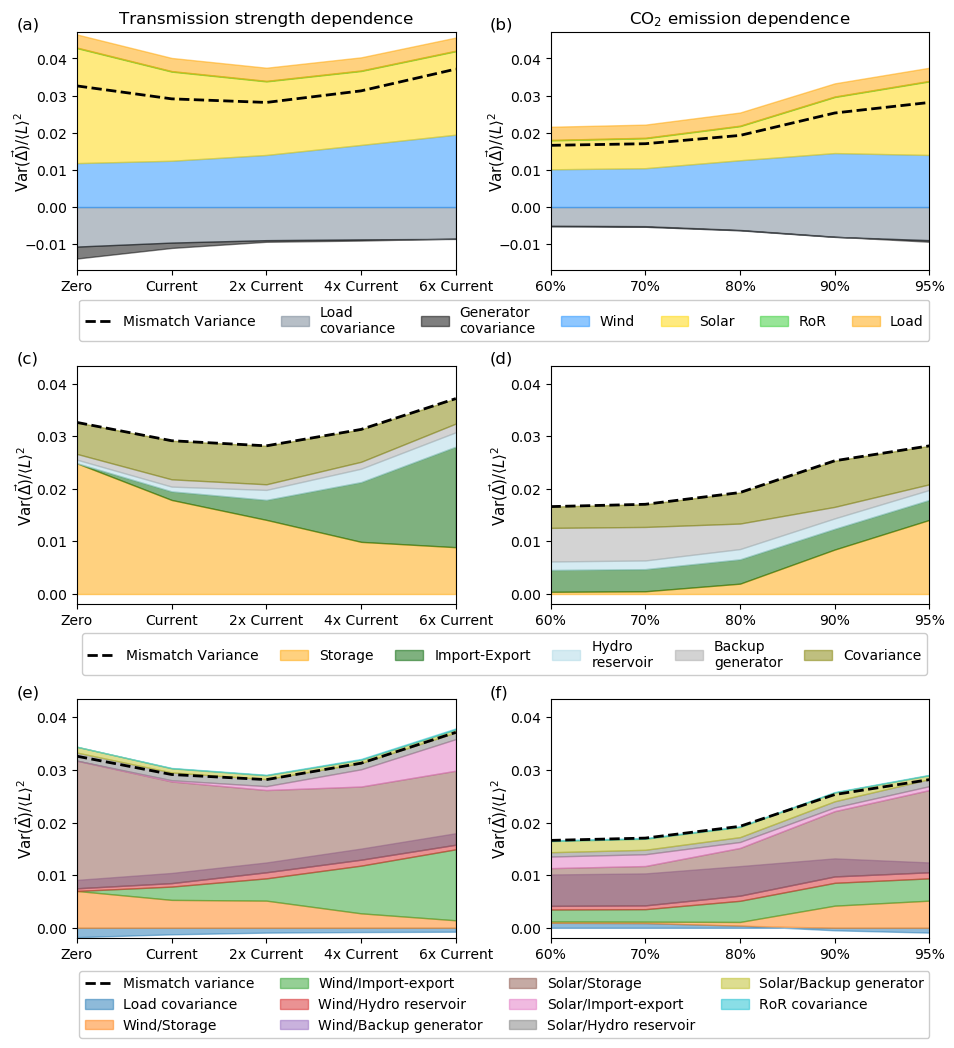

In [23]:
fig = plt.figure(figsize=(11,12), dpi=100)
fs = 10
panels = ['(a)','(b)','(c)','(d)','(e)','(f)']
# Load of network
load = network.loads_t.p.mean(axis=0).sum()
scaling = 1/(load**2)

for i in range(6):
    plt.subplot(3,2,i+1)
    labelpad_y = -0.2
    
    if i==0:
        plt2(lines=False, scaling=scaling)
        labelpad_y = -6
        plt.title('Transmission strength dependence')
    elif i==1:
        plt1(lines=False, scaling=scaling)
        labelpad_y = -6
        plt.legend(loc='center', bbox_to_anchor=(-0.122,-0.21), ncol=7, fontsize=fs, 
                   framealpha=1, columnspacing=1.85, labelspacing=0.75, handletextpad=0.75)
        plt.title('CO$_2$ emission dependence')
    elif i==2:
        plt4(lines=False, scaling=scaling)
    elif i==3:
        plt3(lines=False, scaling=scaling)
        plt.legend(loc='center', bbox_to_anchor=(-0.122,-0.21), ncol=6, fontsize=fs, 
                   framealpha=1, columnspacing=1.55, labelspacing=0.75)
    elif i==4:
        plt6(lines=False, scaling=scaling)
    else:
        plt5(lines=False, scaling=scaling)
        plt.legend(loc='center', bbox_to_anchor=(-0.122,-0.28), ncol=4, fontsize=fs, 
                   framealpha=1, columnspacing=1.85, labelspacing=0.5, handletextpad=0.75)
    
    plt.ylabel(r'Var$(\vec{\Delta})/\langle L\rangle^2$', labelpad=labelpad_y, fontdict={'fontsize':fs+.8})
    plt.xlim(0,4)
    plt.text(-0.16, 1.01, panels[i], fontsize=fs+2, transform=plt.gca().transAxes);

plt.subplots_adjust(hspace=0.4, wspace=0.25)